<a href="https://colab.research.google.com/github/SewoongPark/Medical_classification/blob/main/tox21_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tox21 독성 예측 모델

Tox21 dataset는 NIH(미국 국립보건원)에 의해 구축되었습니다. (https://paperswithcode.com/dataset/tox21-1)

dataset에는 해당 화합물의 구조화 함께 12가지 독성 여부가 포함되어 있습니다. 아래는 독성에 관한 설명으로 다양한 독성이 존재하며 1은 독성이 있는 것 0은 독성이 없는 화학물질 입니다.

- NR-AR : Androgen receptor using the MDA cell line
- NR-AR-LBD : Androgen receptor ligand binding domain
- NR-ER : Estrogen receptor α using the BG1 cell line
- NR-ER-LBD : Estrogen receptor α ligand binding domain
- NR-AhR : Aryl hydrocarbon receptor
- NR-Aromatase : Aromatase enzyme
- NR-PPAR-γ : Peroxisome - proliferator-activated receptor γ
- SR-ARE : Antioxidant response element
- SR-ATAD5 : Luciferase-tagged ATAD5 in human embryonic kidney cells
- SR-HSE : Heat shock response
- SR-MMP :  Mitochondrial membrane potential
- SR-p53 :  p53 response



In [ ]:
!pip install rdkit-pypi

In [ ]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

#데이터프레임에는 분자의 구조가 적혀있는 SMILES와 id, 그리고 다양한 독성 여부가 기록되어 있습니다.
file_name = "/content/drive/MyDrive/tox21.csv"
df = pd.read_csv(file_name)
df.columns

Index(['NR-AR', 'NR-AR-LBD', 'NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD',
       'NR-PPAR-gamma', 'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53',
       'mol_id', 'smiles'],
      dtype='object')

In [ ]:
df[:5]

,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,mol_id,smiles
0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,TOX3021,CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3020,CCN1C(=O)NC(c2ccccc2)C1=O
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,TOX3024,CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,TOX3027,CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,TOX3028,CC(O)(P(=O)(O)O)P(=O)(O)O


#전처리

In [ ]:
df['NR-AR'].value_counts()

0.0    7129
1.0     310
Name: NR-AR, dtype: int64

In [ ]:
df['SR-ARE'].value_counts()

0.0    4974
1.0     961
Name: SR-ARE, dtype: int64

In [ ]:
len(df['SR-ARE'])/len(df['NR-AR'][df['NR-AR'].isna() == True])

13.937391304347827

In [ ]:
id = df['mol_id']
df = df.drop(columns=['mol_id'])

In [ ]:
tox21_tasks = df.columns.values[:12].tolist()

In [ ]:
one = []
zero = []
nan = []

for task in tox21_tasks:
    a = list(df[task].value_counts(dropna=False).to_dict().values())
    zero.append(a[0])
    nan.append(a[1])
    one.append(a[2])
    print(task ,"one:" ,a[2] ," zero:", a[0], " NAN:",a[1])

NR-AR one: 310  zero: 7129  NAN: 575
NR-AR-LBD one: 238  zero: 6664  NAN: 1112
NR-AhR one: 785  zero: 5906  NAN: 1323
NR-Aromatase one: 307  zero: 5633  NAN: 2074
NR-ER one: 798  zero: 5518  NAN: 1698
NR-ER-LBD one: 356  zero: 6756  NAN: 902
NR-PPAR-gamma one: 189  zero: 6394  NAN: 1431
SR-ARE one: 961  zero: 4974  NAN: 2079
SR-ATAD5 one: 267  zero: 6965  NAN: 782
SR-HSE one: 379  zero: 6215  NAN: 1420
SR-MMP one: 936  zero: 4984  NAN: 2094
SR-p53 one: 431  zero: 6478  NAN: 1105


In [ ]:
sum(one), sum(zero)

(5957, 73616)

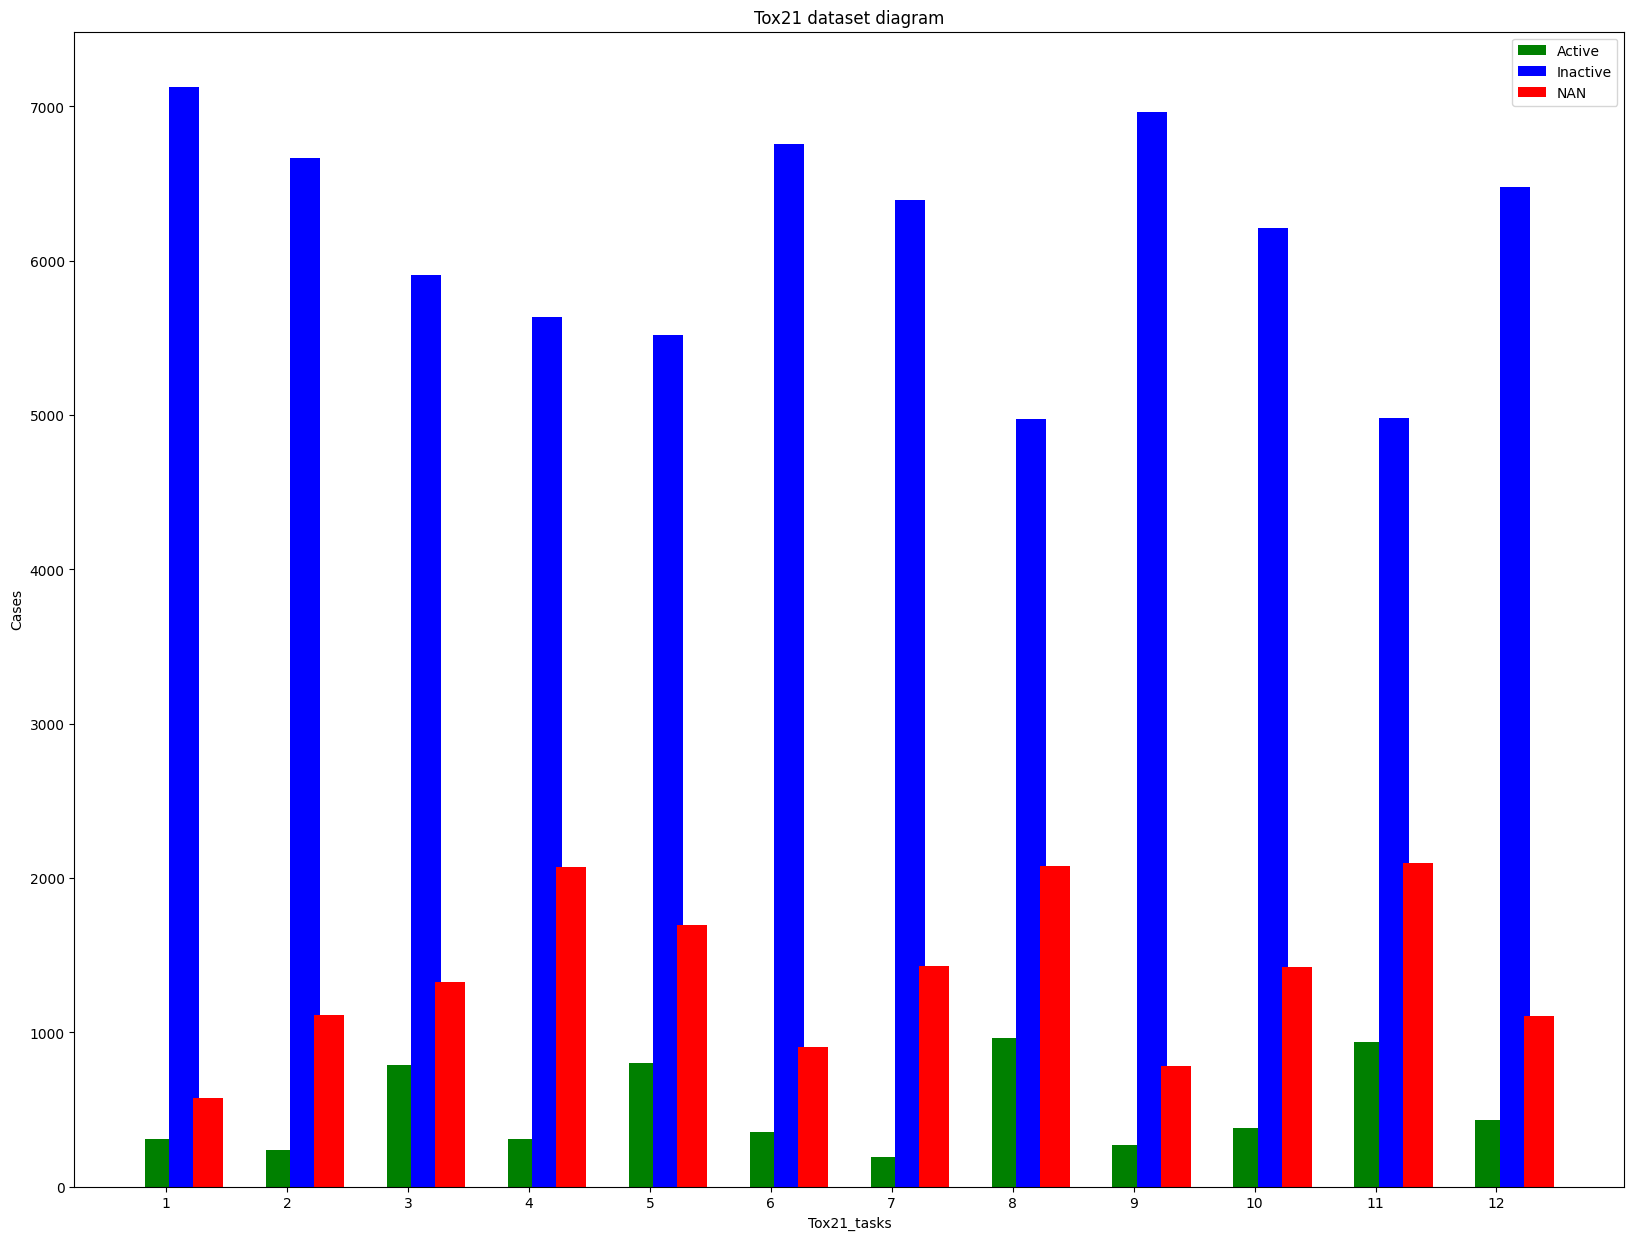

In [ ]:
# Importing the matplotlib library
import numpy as np
import matplotlib.pyplot as plt
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[20, 15])

X = np.arange(1,len(tox21_tasks)+1)
plt.bar(X + 0.2, one, color = 'g', width = 0.25)
plt.bar(X + 0.4, zero, color = 'b', width = 0.25)
plt.bar(X + 0.6, nan, color = 'r', width = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Active' , 'Inactive' ,'NAN'])
# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(1,13)], X)
# Giving the tilte for the plot
plt.title("Tox21 dataset diagram")
# Namimg the x and y axis
plt.xlabel('Tox21_tasks')
plt.ylabel('Cases')
# Saving the plot as a 'png'
plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()

#### 1. ffill, bfill

In [ ]:
df['NR-AR'] = df['NR-AR'].fillna(method = 'ffill')

In [ ]:
df['SR-ARE'] = df['SR-ARE'].fillna(method = 'ffill')

####2. 입력으로 받은 SMILES(간단한 분자 표기법) 문자열을 분자로 변환한 후, Morgan circular fingerprint를 계산하는 함수를 정의

In [ ]:
def smiles_to_fingerprint(smiles, fp_length=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return np.zeros(fp_length)
    else:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=fp_length)
        return np.array(fp, dtype=np.float32)

df['fp'] = pd.DataFrame(df['smiles'].apply(smiles_to_fingerprint))

df['fp']

[07:42:14] WARNING: not removing hydrogen atom without neighbors


0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1       [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...
2       [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...
3       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
8009    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
8010    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
8011    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...
8012    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
8013    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: fp, Length: 8014, dtype: object

In [ ]:
sample_smiles = df['smiles']

sample_fp = np.stack([smiles_to_fingerprint(smiles) for smiles in sample_smiles])

[07:42:25] WARNING: not removing hydrogen atom without neighbors


In [ ]:
sample_fp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sample_fp, df['SR-ARE'], test_size = 0.2, random_state = 45, stratify = df['SR-ARE'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6411, 1024), (1603, 1024), (6411,), (1603,))

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

위의 코드에서 사용된 keras의 모듈은 GridSearchCV에서 사용된 KerasClassifier입니다. 이 모듈은 Scikit-learn과 Keras를 통합하여 사용할 수 있도록 지원하는 것으로, Keras 모델을 Scikit-learn의 그리드 서치와 같은 기능들과 함께 사용할 수 있게 합니다. 이를

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(128, activation = 'relu', input_shape = (1024,)))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.1))


model.add(tf.keras.layers.Dense(2, 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               131200    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)               

In [ ]:
!pip install tf-nightly

메트릭 구현

In [ ]:
from keras import backend as K
from sklearn.metrics import f1_score


In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model.compile(

    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc', f1_m]
)

In [ ]:
history = model.fit(X_train, y_train, epochs = 30,  validation_split = 0.1,
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/30
181/181 [==============================] - 4s 8ms/step - loss: 0.4635 - acc: 0.8357 - f1_m: 0.2676 - val_loss: 0.4651 - val_acc: 0.8193 - val_f1_m: 0.3157
Epoch 2/30
181/181 [==============================] - 1s 7ms/step - loss: 0.3798 - acc: 0.8419 - f1_m: 0.2685 - val_loss: 0.4724 - val_acc: 0.8396 - val_f1_m: 0.3157
Epoch 3/30
181/181 [==============================] - 1s 7ms/step - loss: 0.3059 - acc: 0.8747 - f1_m: 0.2670 - val_loss: 0.5068 - val_acc: 0.8069 - val_f1_m: 0.3157
Epoch 4/30
181/181 [==============================] - 1s 7ms/step - loss: 0.2135 - acc: 0.9164 - f1_m: 0.2681 - val_loss: 0.6901 - val_acc: 0.8178 - val_f1_m: 0.3157
Epoch 5/30
181/181 [==============================] - 2s 10ms/step - loss: 0.1490 - acc: 0.9480 - f1_m: 0.2684 - val_loss: 0.7827 - val_acc: 0.8209 - val_f1_m: 0.3157
Epoch 6/30
181/181 [==============================] - 2s 11ms/step - loss: 0.1039 - acc: 0.9646 - f1_m: 0.2695 - val_loss: 0.8858 - val_acc: 0.8349 - val_f1_m: 0.3157
Ep

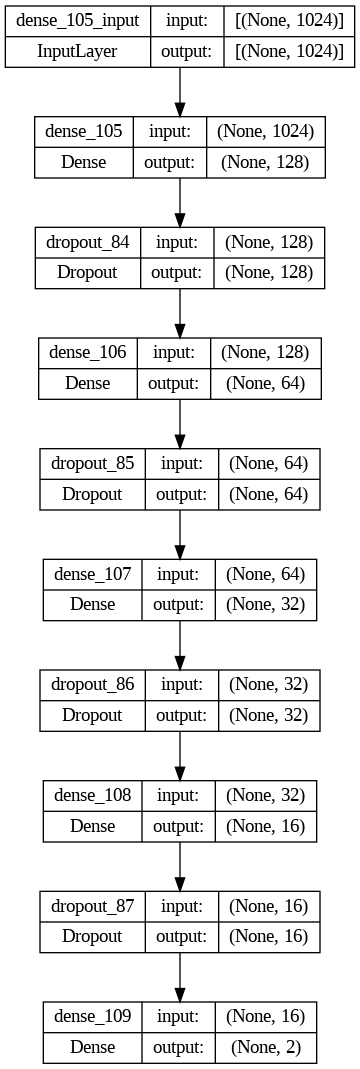

In [ ]:
tf.keras.utils.plot_model(model, to_file = 'model.png', show_shapes = True)

In [ ]:
model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 3ms/step - loss: 1.1995 - acc: 0.7873 - f1_m: 0.2676


[1.1994515657424927, 0.7872738838195801, 0.2675899863243103]

In [ ]:
y_test_pred = model.predict(X_test)

51/51 [==============================] - 0s 2ms/step


In [ ]:
history.history['val_f1_m']

[0.3157050311565399,
 0.3157050311565399,
 0.3157050311565399,
 0.3157050311565399,
 0.3157050311565399,
 0.3157050311565399,
 0.3157050311565399,
 0.3157050311565399,
 0.3157050311565399,
 0.3157050311565399,
 0.3157050311565399]

In [ ]:
hist_loss =history.history['loss']
hist_acc =history.history['acc']

hist_val_loss = history.history['val_loss']
hist_val_acc = history.history['val_acc']

hist_f1 = history.history['f1_m']
hist_val_f1 = history.history['val_f1_m']

In [ ]:
from matplotlib import pyplot as plt

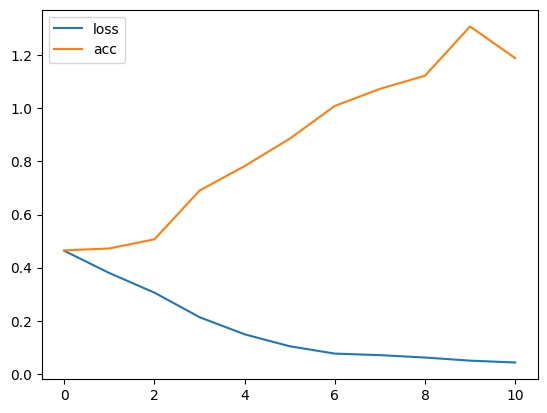

In [ ]:
plt.plot( hist_loss)
plt.plot(hist_val_loss)
# plt.plot(hist_acc)
plt.legend(['loss', 'acc'])

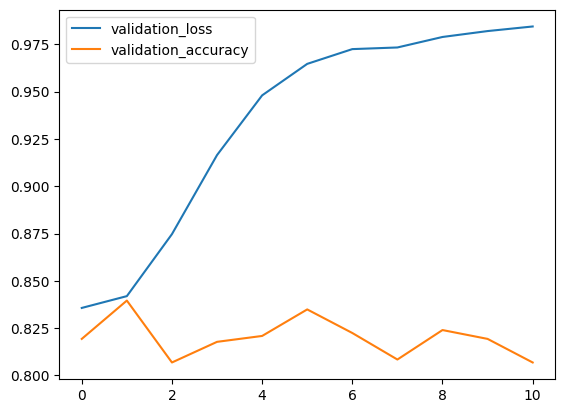

In [ ]:
plt.plot(hist_acc)
plt.plot(hist_val_acc)

plt.legend(['validation_loss', 'validation_accuracy'])

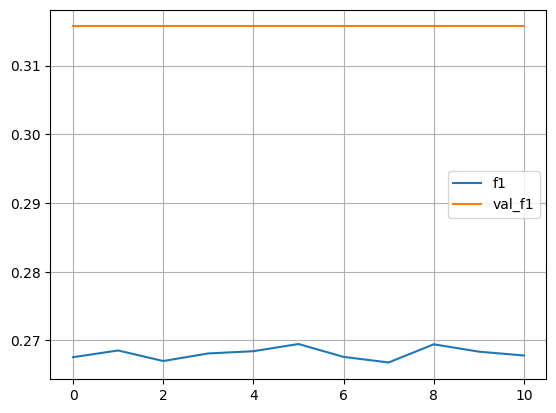

In [ ]:
plt.plot(hist_f1)
plt.plot(hist_val_f1)
plt.grid(True)
plt.legend(['f1', 'val_f1'])

In [ ]:
y_test.shape, y_test_pred.shape

((1603,), (1603, 2))

In [ ]:
df['smiles'].astype(str)

0                            CCOc1ccc2nc(S(N)(=O)=O)sc2c1
1                               CCN1C(=O)NC(c2ccccc2)C1=O
2       CC[C@]1(O)CC[C@H]2[C@@H]3CCC4=CCCC[C@@H]4[C@H]...
3                         CCCN(CC)C(CC)C(=O)Nc1c(C)cccc1C
4                               CC(O)(P(=O)(O)O)P(=O)(O)O
                              ...                        
8009    CCOc1nc2cccc(C(=O)O)c2n1Cc1ccc(-c2ccccc2-c2nnn...
8010    CC(=O)[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(...
8011    C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...
8012    C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...
8013              COc1ccc2c(c1OC)CN1CCc3cc4c(cc3C1C2)OCO4
Name: smiles, Length: 8014, dtype: object

In [ ]:
from sklearn.metrics import roc_curve

pred_label = model.predict(X_test)[:,1]
fprs, tprs, threshold = roc_curve(y_test, pred_label)

precision, recall, threshold = roc_curve(y_test, pred_label)


51/51 [==============================] - 0s 2ms/step


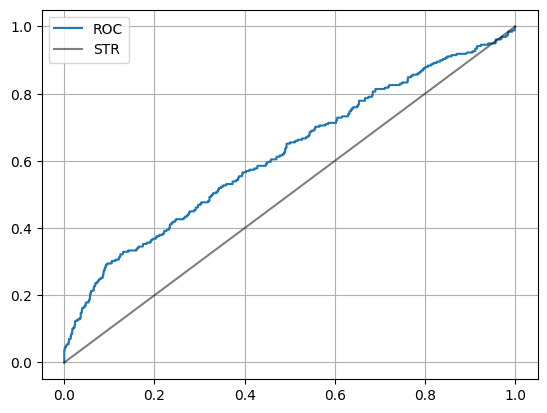

In [ ]:
plt.plot(fprs, tprs)
plt.plot([0,1], [0,1] ,color = 'black', alpha = 0.5)
plt.grid(True)
plt.legend(['ROC', 'STR'])

In [ ]:
from sklearn.metrics import confusion_matrix

y_test_pred = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred, axis = 1)
# y_test = np.argmax(y_test, axis = 0)

result = confusion_matrix(y_test, y_test_pred, normalize = 'pred')


51/51 [==============================] - 0s 3ms/step


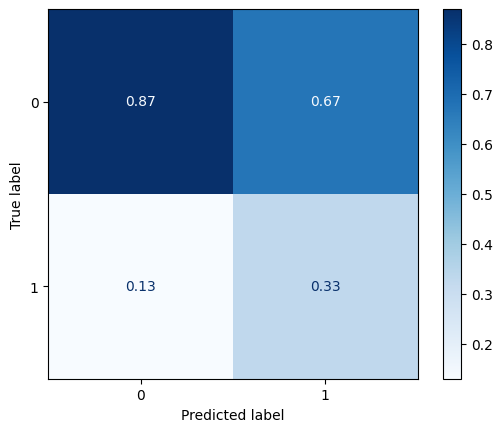

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
# labels = ["Cats", "Dogs", "Horses"]

disp = ConfusionMatrixDisplay(confusion_matrix=result)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
y_test_pred[:10], y_test

머신러닝 모델과 비교

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Decision Tree Classifier 및 XGBoost Classifier 정의
model_dct = DecisionTreeClassifier()
model_xgb = XGBClassifier()

# Grid search를 위한 grid 선
param_grid_dct = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5]
}

param_grid_xgb = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300]
}


grid_search_dct = GridSearchCV(estimator=model_dct, param_grid=param_grid_dct, cv=3)
grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid_xgb, cv=3)


grid_search_dct.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)


print("Decision Tree Classifier - Best Score:", grid_search_dct.best_score_)
print("Decision Tree Classifier - Best Params:", grid_search_dct.best_params_)

print("XGBoost Classifier - Best Score:", grid_search_xgb.best_score_)
print("XGBoost Classifier - Best Params:", grid_search_xgb.best_params_)


Decision Tree Classifier - Best Score: 0.8390266729059429
Decision Tree Classifier - Best Params: {'criterion': 'gini', 'max_depth': 1}
XGBoost Classifier - Best Score: 0.8418343472157229
XGBoost Classifier - Best Params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}


In [ ]:
model_dct.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
model_dct.score(X_test, y_test)

0.7635683094198378

In [ ]:
model_xgb.fit(X_train, y_train)
model_xgb.score(X_train, y_train)

0.9271564498518172

In [ ]:
model_dct.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
model_xgb.feature_importances_

array([0.        , 0.00111695, 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score

print(accuracy_score(y_test ,model_dct.predict(X_test)))
print(accuracy_score(y_test ,model_xgb.predict(X_test)))

0.7635683094198378
0.8390517779164067


In [ ]:
from sklearn.metrics import classification_report
print("classification report of dct:",classification_report(y_test , model_dct.predict(X_test)))
print("-"*50)
print("classification report of xgb:",classification_report(y_test , model_xgb.predict(X_test)))

classification report of dct:               precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1345
         1.0       0.24      0.21      0.22       258

    accuracy                           0.76      1603
   macro avg       0.55      0.54      0.54      1603
weighted avg       0.75      0.76      0.76      1603

--------------------------------------------------
classification report of xgb:               precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      1345
         1.0       0.50      0.16      0.24       258

    accuracy                           0.84      1603
   macro avg       0.68      0.56      0.57      1603
weighted avg       0.80      0.84      0.80      1603



In [ ]:
model_xgb.feature_importances_

array([0.00054741, 0.00055829, 0.00057412, ..., 0.00091955, 0.00121541,
       0.00144887], dtype=float32)

더 나은 성능을 보이는 xgboost에 대해 검증

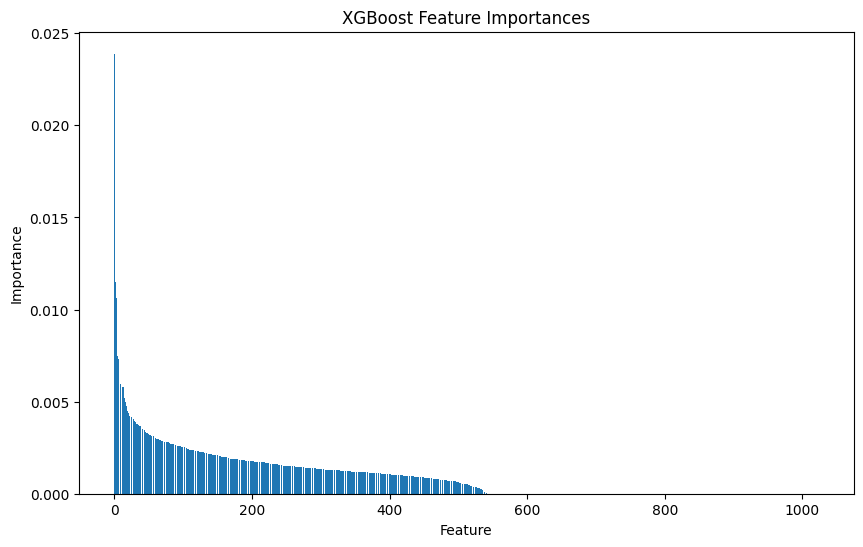

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# XGBoost 모델의 feature importances
feature_importances = model_xgb.feature_importances_
feature_names = df.columns  # 데이터프레임의 열 이름을 사용

# 시각화
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importances)[::-1]
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
# plt.xticks(range(len(feature_importances)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importances')
plt.show()


In [ ]:
model_xgb.score(X_train, y_train)

0.9271564498518172

In [ ]:
pred = model_xgb.predict(X_test)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91      1345
         1.0       0.50      0.16      0.24       258

    accuracy                           0.84      1603
   macro avg       0.68      0.56      0.57      1603
weighted avg       0.80      0.84      0.80      1603



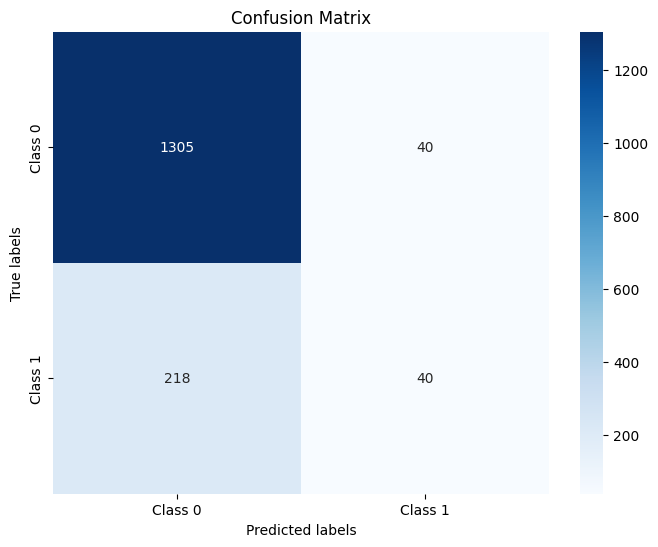

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 모델 평가
print("Classification Report:")
print(classification_report(y_test, pred))

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


#LSTM 모델 적용

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6411, 1024), (1603, 1024), (6411,), (1603,))

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) #3차원의 형태로 reshape

In [ ]:
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], 1)

In [ ]:
X_train.shape

(6411, 1024, 1)

In [ ]:
from tensorflow.keras import models, layers
from keras.layers import LSTM

In [ ]:
model_lstm = models.Sequential()
model_lstm.add(LSTM(200, activation = 'relu', input_shape=(X_train.shape[1],1),return_sequences = True))
model_lstm.add(tf.keras.layers.Dropout(0.1))

model_lstm.add(tf.keras.layers.Dense(64, activation = 'relu'))
model_lstm.add(tf.keras.layers.Dropout(0.1))

model_lstm.add(tf.keras.layers.Dense(32, activation = 'relu'))
model_lstm.add(tf.keras.layers.Dropout(0.1))

# model_lstm.add(layers.Dense(16, activation = 'relu'))
model_lstm.add(layers.Dense(2, activation = 'softmax'))


In [ ]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 1024, 200)         161600    
                                                                 
 dropout (Dropout)           (None, 1024, 200)         0         
                                                                 
 dense (Dense)               (None, 1024, 64)          12864     
                                                                 
 dropout_1 (Dropout)         (None, 1024, 64)          0         
                                                                 
 dense_1 (Dense)             (None, 1024, 32)          2080      
                                                                 
 dropout_2 (Dropout)         (None, 1024, 32)          0         
                                                                 
 dense_2 (Dense)             (None, 1024, 2)          

In [ ]:
%pip install tensorflow==2.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 693.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 46.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  A

In [ ]:
model_lstm.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

history = model_lstm.fit(X_train, y_train,
                    epochs = 30,
                    validation_split = 0.1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/30


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>
      ColabKernelApp.launch_instance()
    File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start
      self.io_loop.start()
    File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback
      ret = callback()
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner
      self.ctx_run(self.run)
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run
      yielded = self.gen.send(value)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request
      self.do_execute(
    File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
      result = self._run_cell(
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-31-bf5853869c3d>", line 4, in <cell line: 4>
      history = model_lstm.fit(X_train, y_train,
    File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert'
assertion failed: [Condition x == y did not hold element-wise:] [x (sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/Shape_1:0) = ] [32 1] [y (sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/strided_slice:0) = ] [32 1024]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/assert_equal_1/Assert/Assert}}]] [Op:__inference_train_function_3154]

In [ ]:
model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 3ms/step - loss: 3.4657 - acc: 0.8391


[3.4657340049743652, 0.8390517830848694]

In [ ]:
hist_acc = history.history['acc']
hist_val_acc = history.history['val_acc']

hist_loss = history.history['loss']
hist_val_loss = history.history['val_loss']

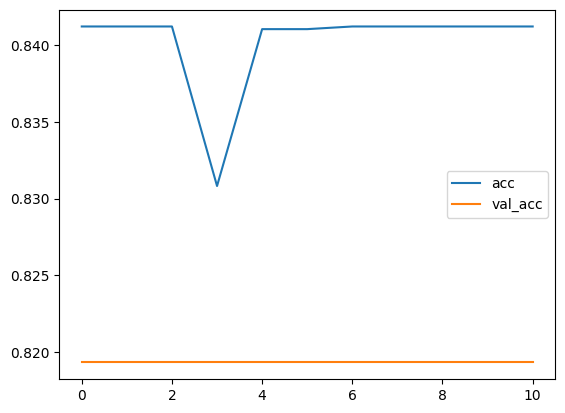

In [ ]:
plt.plot(hist_acc)
plt.plot(hist_val_acc)
plt.legend(['acc', 'val_acc'])

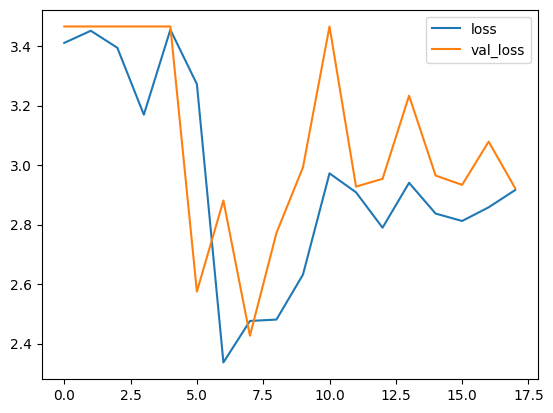

In [ ]:
plt.plot(hist_loss)
plt.plot(hist_val_loss)
plt.legend(['loss', 'val_loss'])

In [ ]:
#이 물질들은 독성이 있을까요? 없을까요? 추론해봅시다

sample_smiles = [
    'CC1=C(C=C(C=C1)C(=O)O)O',
    'C1=CNC(=C1)C(=O)N',
    'CC1=CC(=O)C(=C(C1)C)O',
    'C1=CC(=C(C=C1)O)O',
    'C1=CC(=C(C=C1[N+](=O)[O-])O)O',
    'C1=CC(=C(C=C1)O)N',
    'CC1=CC(=C(C=C1C)O)O',
    'C1=CC(=C(C=C1)O)C=O',
    'C1=CC(=C(C=C1O)O)C',
    'C1=CC(=C(C=C1)C)O'
]

# SMILES 문자열을 fingerprint으로 변환
sample_fp = np.stack([smiles_to_fingerprint(smiles) for smiles in sample_smiles])

NameError: name 'smiles_to_fingerprint' is not defined